In [ ]:
# !pip install category_encoders
# !pip install shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[:15]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
eui_train = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/train_38_predictors.csv')
eui_test = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/test_38_predictors.csv')

we need to split the dataset for the train validation set based on Year_Factor.
- Train set: all Year_Factor from 1-5
- Val set: all Year_Factor 6
- Test set: all Year_Factor 7

In [ ]:
pd.options.display.max_columns=None
X = eui_train.drop('site_eui', axis=1)
y = eui_train['site_eui']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
print('train rmse:', mean_squared_error(y_train, lr.predict(X_train), squared=False))
print('val rmse: ', mean_squared_error(y_val, y_pred, squared=False))


print('train mae:', mean_absolute_error(y_train, lr.predict(X_train)))
print('val mae: ', mean_absolute_error(y_val, y_pred))

train rmse: 47.19160132314198
val rmse:  49.154770608212196
train mae: 24.686047917017643
val mae:  24.91710043827952


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_val)

In [ ]:
print('train rmse:', mean_squared_error(y_train, dtr.predict(X_train), squared=False))
print('val rmse: ', mean_squared_error(y_val, y_pred, squared=False))

print('train mae:', mean_absolute_error(y_train, dtr.predict(X_train)))
print('val mae: ', mean_absolute_error(y_val, y_pred))

train rmse: 1.1257021167079726
val rmse:  54.581271503823125
train mae: 0.04721307861471323
val mae:  26.33516903877723


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [ ]:
print('train rmse:', mean_squared_error(y_train, rf.predict(X_train), squared=False))
print('val rmse: ', mean_squared_error(y_val, y_pred, squared=False))

print('train mae:', mean_absolute_error(y_train, rf.predict(X_train)))
print('val mae: ', mean_absolute_error(y_val, y_pred))

train rmse: 15.111905265572126
val rmse:  42.40610594230804
train mae: 7.7274815555879925
val mae:  20.81383383442028


Decision Tree and Random Forest are overfitting.

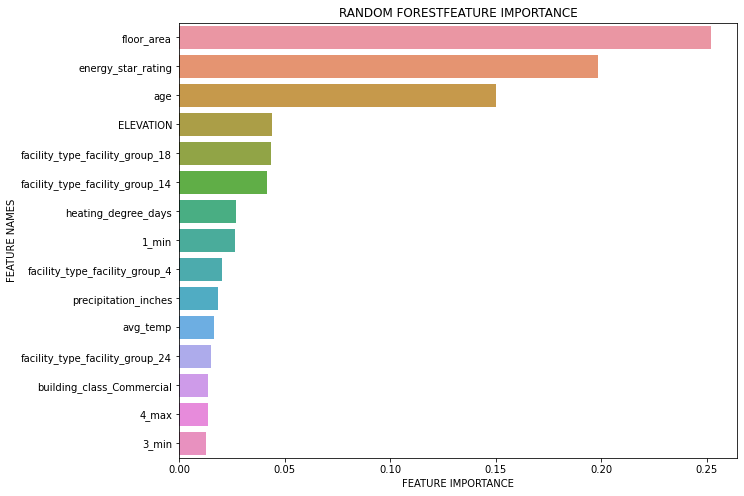

In [ ]:
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

## XGboost

In [ ]:
import xgboost

xgboost_model = xgboost.XGBRegressor()
xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_val)

[18:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('train rmse:', mean_squared_error(y_train, xgboost_model.predict(X_train), squared=False))
print('val rmse: ', mean_squared_error(y_val, y_pred, squared=False))

print('train mae:', mean_absolute_error(y_train, xgboost_model.predict(X_train)))
print('val mae: ', mean_absolute_error(y_val, y_pred))

train rmse: 44.00316160810098
val rmse:  46.755332250648536
train mae: 23.129933849019327
val mae:  23.52481857404033


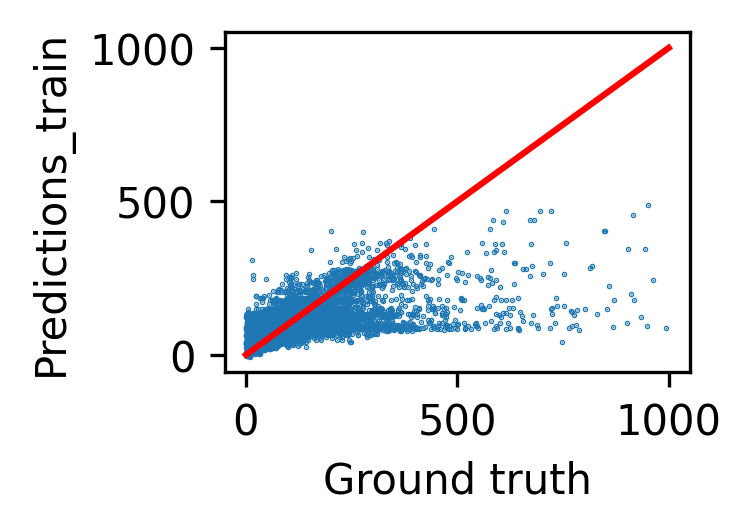

In [ ]:
  width=2
  fig = plt.figure(figsize=(width,0.75*width),dpi=300) 
  Y_train_pred = xgboost_model.predict(X_train)
  plt.scatter(y_train,Y_train_pred, s=0.1)
  plt.ylabel('Predictions_train',fontsize=10) 
  plt.xlabel('Ground truth',fontsize=10)
  plt.plot( [0,1000],[0,1000] , 'r')
  # fig.savefig(OutDirectory+weightsdir+"/{}-predict-train.png".format(VNew),bbox_inches='tight')

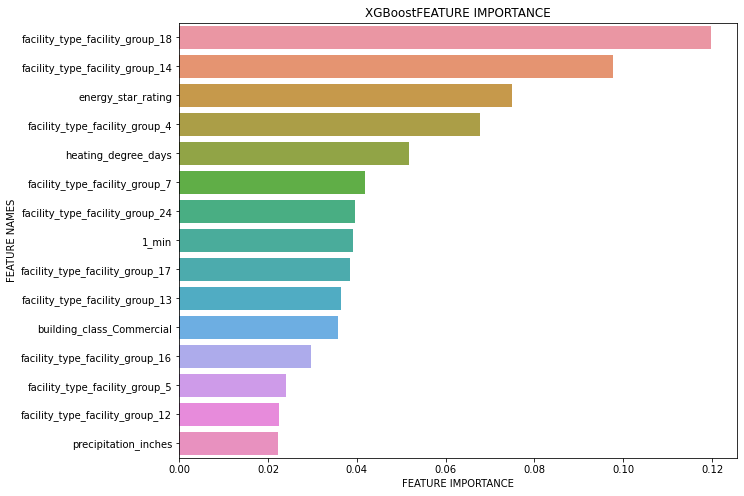

In [ ]:
plot_feature_importance(xgboost_model.feature_importances_,X_train.columns,'XGBoost')